In [1]:
import pandas as pd
import numpy as np

#Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
import category_encoders as ce

#Imputation
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#Sampling
from imblearn.over_sampling import KMeansSMOTE

#Modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Importing Data and Overview

In [2]:
df = pd.read_csv('/Users/Shared/Shyam/Datasets/fraud_data.csv')
pd.set_option('max_columns' , 500)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [3]:
#Resetting Index to TransactionID

df = df.set_index('TransactionID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 393 entries, isFraud to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.7+ GB


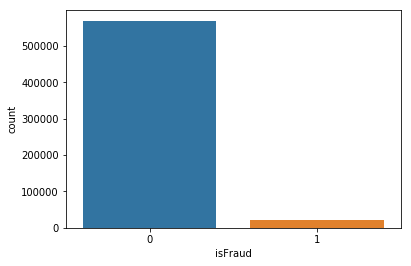

In [5]:
#Distribution of Target Variable

sns.countplot(df.isFraud)

## Handling Missing Values

In [6]:
#Checking for null values

(df.isnull().sum()/len(df) * 100).sort_values(ascending = False)

dist2             93.628374
D7                93.409930
D13               89.509263
D14               89.469469
D12               89.041047
D6                87.606767
D8                87.312290
D9                87.312290
V153              86.123717
V148              86.123717
V149              86.123717
V158              86.123717
V147              86.123717
V154              86.123717
V155              86.123717
V146              86.123717
V161              86.123717
V142              86.123717
V162              86.123717
V163              86.123717
V157              86.123717
V141              86.123717
V140              86.123717
V139              86.123717
V138              86.123717
V156              86.123717
V164              86.122701
V160              86.122701
V159              86.122701
V143              86.122701
                    ...    
V311               0.002032
V312               0.002032
V316               0.002032
V317               0.002032
V319               0

In [7]:
#Removing columns with more than 70% missing values

df = df.loc[: , df.isnull().sum()/len(df) < 0.7]

## Seperating numerical and categorical variables

In [8]:
numerical = df.select_dtypes(include = ['float64' , 'int64'])
categorical = df.select_dtypes(include = ['object'])

In [9]:
numerical.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,514518.000000,311253.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,

In [10]:
categorical.describe()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,590540,588963,588969,496084,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,5,4,4,59,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,T,T,T,M0,F,F,F,F,T
freq,439670,384767,439938,228355,319415,285468,251731,196405,132491,227856,211374,155251,205656


## Reducing number of unique values

In [11]:
df['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
windstream.net         305
hotmail.es             305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

In [12]:
df['P_emaildomain'] = df['P_emaildomain'].replace('gmail' , 'gmail.com')  

df['P_emaildomain'] = df['P_emaildomain'].replace(['ymail.com' , 'yahoo.com.mx' , 'yahoo.fr' , 'yahoo.es' , 
                                                   'yahoo.de' , 'yahoo.co.uk' , 'yahoo.co.jp'] , 'yahoo.com')


df['P_emaildomain'] = df['P_emaildomain'].replace(['hotmail.es' , 'hotmail.fr' , 'hotmail.co.uk' , 
                                                   'hotmail.de'] , 'hotmail.com')      

df['P_emaildomain'] = df['P_emaildomain'].replace(['comcast.net' , 'icloud.com' , 'outlook.com' , 'msn.com' , 
                                                   'att.net' , 'live.com' , 'sbcglobal.net' , 'verizon.net' , 
                                                   'bellsouth.net' , 'me.com' , 'cox.net' , 'optonline.net' , 
                                                   'charter.net' , 'live.com.mx' , 'rocketmail.com' , 
                                                   'mail.com' , 'earthlink.net' , 'outlook.es' , 'mac.com' , 
                                                   'juno.com' , 'aim.com' , 'roadrunner.com' , 
                                                   'windstream.net' , 'frontier.com' , 'embarqmail.com' , 
                                                   'web.de' , 'twc.com' , 'netzero.com' , 'prodigy.net.mx' , 
                                                   'centurylink.net' , 'netzero.net' , 'frontiernet.net' , 
                                                   'q.com' , 'suddenlink.net' , 'cfl.rr.com' , 'sc.rr.com' , 
                                                   'cableone.net' , 'gmx.de' , 'protonmail.com' , 'ptd.net' , 
                                                   'live.fr' , 'servicios-ta.com'] , 'others')  
df['P_emaildomain'].value_counts()

gmail.com        228851
yahoo.com        105305
others            50636
hotmail.com       46005
anonymous.com     36998
aol.com           28289
Name: P_emaildomain, dtype: int64

## Encoding categorical variables

In [13]:
oe = ce.ordinal.OrdinalEncoder(handle_missing = 'return_nan')
df[categorical.columns] = oe.fit_transform(df[categorical.columns])

## Sampling and selecting important features

In [14]:
sample_df = df.dropna()
sample_df['isFraud'].value_counts()

0    39143
1     1594
Name: isFraud, dtype: int64

In [15]:
def feature_selector(X, y, num_feats):
    
    X_norm = MinMaxScaler().fit_transform(X)

    #Chi-Square
    chi_selector = SelectKBest(chi2, k = num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns
    
    #f_classif
    f_selector = SelectKBest(f_classif, k = num_feats)
    f_selector.fit(X_norm, y)
    f_support = f_selector.get_support()
    f_feature = X.loc[:, f_support].columns
    
    #Recursive Feature Elimination
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select= num_feats, step=10, verbose=5)
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns
    
    #Lasso
    embeded_lr_selector = SelectFromModel(LogisticRegression(), max_features = num_feats)
    embeded_lr_selector.fit(X_norm, y)
    embeded_lr_support = embeded_lr_selector.get_support()
    embeded_lr_feature = X.loc[:,embeded_lr_support].columns
    
    #Random Forest
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), 
                                          max_features = num_feats)
    embeded_rf_selector.fit(X, y)
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns
    
    feature_selection_df = pd.DataFrame({'Feature': X.columns, 'chi-2': chi_support, 'f-support': f_support, 
                                         'RFE': rfe_support, 'Lasso': embeded_lr_support, 
                                         'Random Forest': embeded_rf_support})
    feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    
    return feature_selection_df

In [16]:
X = sample_df.drop('isFraud', axis = 1)
y = sample_df['isFraud']
num_feats = 90
important_features = feature_selector(X, y, num_feats)

Fitting estimator with 224 features.
Fitting estimator with 214 features.
Fitting estimator with 204 features.
Fitting estimator with 194 features.
Fitting estimator with 184 features.
Fitting estimator with 174 features.
Fitting estimator with 164 features.
Fitting estimator with 154 features.
Fitting estimator with 144 features.
Fitting estimator with 134 features.
Fitting estimator with 124 features.
Fitting estimator with 114 features.
Fitting estimator with 104 features.
Fitting estimator with 94 features.


In [17]:
important_features.head()

,Feature,chi-2,f-support,RFE,Lasso,Random Forest,Total
1,card6,True,True,True,True,True,5
2,V54,True,True,True,True,True,5
3,V320,True,True,True,True,True,5
4,V316,True,True,True,True,True,5
5,V315,True,True,True,True,True,5


## Combining sample data with fraudulent transactions containing null values

In [18]:
null_data = df[df.isna().any(axis = 1)]

fraud_null = null_data[null_data['isFraud'] == 1]

combined_data = pd.concat([sample_df, fraud_null], axis = 0, join = 'outer').sort_index()
combined_data.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987097,0,88147,21.5,1.0,2581,199.0,150.0,2.0,202.0,2.0,436.0,87.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,59.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.000000,0.0,0.0,59.000000,0.0,0.0,59.0,59.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
2987181,0,89437,171.0,1.0,16632,215.0,150.0,2.0,166.0,2.0,299.0,87.0,6.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,2.0,151.0,151.0,17.0,232.0,23.0,232.0,150.0,232.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,553.950012,0.0,0.0,553.950012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987200,0,89666,34.0,1.0,12577,268.0,150.0,3.0,166.0,2.0,184.0,87.0,17.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,2.0,93.0,93.0,93.0,430.0,93.0,93.0,257.0,190.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [19]:
combined_data['isFraud'].value_counts()

0    39143
1    20663
Name: isFraud, dtype: int64

## Preparing final data and imputing missing values

In [20]:
cols = important_features['Feature'][:95].tolist()
cols.append('isFraud')
final_data = combined_data[cols]
final_data.head()

,card6,V54,V320,V316,V315,V314,V313,V312,V310,V307,V306,V298,V295,V294,V291,V283,V282,V280,V131,V13,V128,V126,TransactionAmt,D5,D3,D2,D11,D10,V98,V94,V83,V76,V74,V73,V56,V55,V52,V51,V38,V299,V289,V284,V281,V20,V133,V132,V129,V127,V101,dist1,V97,V96,V82,V67,V62,V33,V318,V317,V309,V308,V300,V3,V296,V292,V29,V285,V26,V134,V130,V12,V103,V102,M9,D4,D15,D1,C14,C12,C11,V99,V95,V9,V87,V78,V77,V75,V7,V69,V66,V61,V6,V53,V5,V49,V45,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987097,2.0,1.0,0.0,0.0,59.0,59.0,59.0,0.0,59.000000,59.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21.5,9.0,9.0,9.0,9.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,59.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,59.0,1.0,0.0,0.0,3.0,9.0,9.0,9.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0
2987181,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,553.950012,553.950012,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.0,23.0,17.0,151.0,150.0,232.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,232.0,232.0,151.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2987200,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,93.0,93.0,93.0,257.0,93.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,430.0,190.0,93.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0
2987203,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,445.0,NaN,52.0,57.0,NaN,80.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,374.0,57.0,2.0,0.0,1.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,1.0,1.0,NaN,1.0,NaN,0.0,1.0,1
2987218,2.0,3.0,0.0,321.0,215.0,215.0,215.0,215.0,215.000000,536.000000,321.0,0.0,3.0,3.0,1.0,6.0,2.0,5.0,215.0,3.0,536.0,321.0,117.0,0.0,0.0,3.0,90.0,2.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,3.0,321.0,321.0,0.0,536.0,3.0,90.0,5.0,5.0,2.0,1.0,3.0,0.0,321.0,321.0,0.0,536.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,321.0,215.0,2.0,3.0,3.0,2.0,0.0,2.0,3.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,0


In [21]:
imputer = IterativeImputer(random_state = 42)
imputed_data = pd.DataFrame(imputer.fit_transform(final_data), columns = final_data.columns)
imputed_data.isnull().any().sum()

0

## Train test split and oversampling

In [22]:
X = imputed_data.drop('isFraud', axis = 1)
y = imputed_data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 72)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50835, 95)
Shape of y_train:  (50835,)
Shape of X_test:  (8971, 95)
Shape of y_test:  (8971,)


In [23]:
sampler = KMeansSMOTE(random_state = 42)
X_res, y_res = sampler.fit_resample(X_train, y_train)

print("Shape of X_res: ", X_res.shape)
print("Shape of y_res: ", y_res.shape)
print("Target count:", y_res.value_counts(), sep = '\n')

Shape of X_res:  (66543, 95)
Shape of y_res:  (66543,)
Target count:
1.0    33272
0.0    33271
Name: isFraud, dtype: int64


## Compiling and fitting 2 layer neural network

In [24]:
model = Sequential()
model.add(Dense(15, input_dim = 95, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dense(12, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                1440      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,645
Trainable params: 1,645
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_res, y_res, batch_size = int(len(X_train)/8), epochs = 600, 
                    validation_data = (X_test, y_test), verbose = False)

Instructions for updating:
Use tf.cast instead.


In [26]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy:", round(accuracy, 4))
print("Training Loss:", round(loss, 4))

loss, accuracy = model.evaluate(X_test, y_test, verbose = False)
print("\nTesting Accuracy:", round(accuracy, 4))
print("Testing Loss:", round(loss, 4))

Training Accuracy: 0.9416
Training Loss: 0.1669

Testing Accuracy: 0.9378
Testing Loss: 0.1805


## Plotting accuracy and loss

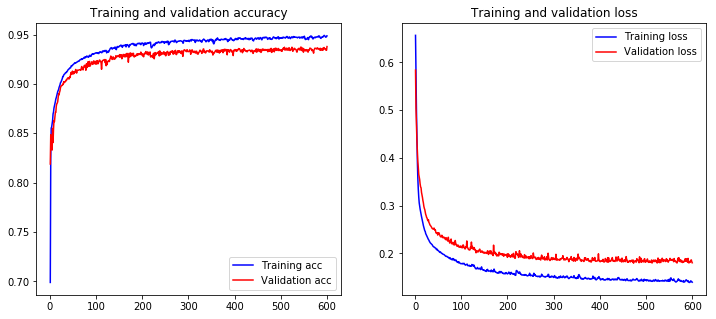

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label = 'Training acc')
plt.plot(x, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

## Prediction

In [28]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5872
         1.0       0.95      0.86      0.91      3099

    accuracy                           0.94      8971
   macro avg       0.94      0.92      0.93      8971
weighted avg       0.94      0.94      0.94      8971

Confusion Matrix:
 [[5742  130]
 [ 428 2671]]
